## RNA-Seq Workflow Template

1. Import modules from rnaseq package

Make sure to have numpy 1.xx installed. It does not currently support numpy 2

In [1]:
import pandas as pd
from pyensembl import EnsemblRelease
from rnaseq import clustering
from rnaseq import SOM
from rnaseq import mapping
from rnaseq import gogsea

Run '!pyensembl install --release 77 --species human' in terminal to install Ensembl.

Release 77 is the latest release, as of the writing of this template. Update if needed.

Begin commands with '!' to run terminal commands in Jupyter Notebook.

In [6]:
file='Datasets/logCPM_Frank_cent(conf).csv' #selects data file
dataset= pd.read_csv(file, delimiter=",", header=0, index_col=0) #make it into a dataframe 
ensembl_id=False #choose whether it uses ensembl_ids or gene symbols
Ensembl=EnsemblRelease(release=111, species='human') #load ensembl to match ensembl ids and gene symbols
nreplicates=3 #specify the number of replicate conditions

In [3]:
#Dataset Simão

file='Datasets/TeissandierMulti_genes_gencode_all_rmsk_perFamily_Sofia.csv' #selects data file
dataset= pd.read_csv(file, delimiter=",", header=0, index_col=0) #make it into a dataframe 
ensembl_id=True #choose whether it uses ensembl_ids or gene symbols
Ensembl=EnsemblRelease(release=111, species='human') #load ensembl to match ensembl ids and gene symbols
nreplicates=1 #specify the number of replicate conditions
dataset.drop([
    '...analysis.STAR_assembly_Gencode.TeissandierMulti.DF6_D35Aligned.sortedByCoord.out.bam', 
    '...analysis.STAR_assembly_Gencode.TeissandierMulti.ASD3X_D35Aligned.sortedByCoord.out.bam', 
    '...analysis.STAR_assembly_Gencode.TeissandierMulti.ASD_D35Aligned.sortedByCoord.out.bam'],
     axis=1, inplace=True)
##Symbols to Gene IDs
dados=SOM.tratamento(dataset)

def treat_simao(cenas):
    total=0
    subs=0
    te=0
    for idx in range(cenas.shape[0]):
        if not cenas[idx, 0].startswith('ENSG'):
            total+=1
            if cenas[idx,0].startswith('TE_'):
                te+=1
            try:
                gene_id = Ensembl.gene_ids_of_gene_name(cenas[idx,0])
                cenas[idx, 0] = gene_id[0]
                subs+=1
            except ValueError:
                print(f'{cenas[idx,0]} not recognized')
        
    print(f'total symbols:{total-te}')
    print(f'subs:{subs}')
    print(f'tranposable elements:{te}')
    return cenas

#Gene ID to symbols

# def treat_simao(cenas):
#     # Loop over indices to access and modify values in the first column
#     total=0
#     subs=0
#     for idx in range(cenas.shape[0]):
#         if cenas[idx, 0].startswith('ENSG'):
#             total+=1
#             try:
#                 genetranslation = Ensembl.gene_by_id(cenas[idx, 0])
#                 gene_name = genetranslation.gene_name
#                 cenas[idx, 0] = gene_name  # Replace ENSG ID with gene name
#                 subs+=1
#             except ValueError:
#                 print(f'{cenas[idx,0]} not recognized')
        
#     print(f'total:{total}')
#     print(f'subs:{subs}')
#     return cenas

fim=treat_simao(dados)

header_list = dataset.columns.tolist()
header_list = [col[51:-29] for col in header_list]
simao_dataset=pd.DataFrame(fim[0:], index=dados[:,0])
simao_dataset=simao_dataset.drop(simao_dataset.columns[0], axis=1)
simao_dataset.columns= header_list
simao_dataset = simao_dataset.apply(pd.to_numeric, errors='coerce')


def avgmapsimao(main_map):
    main_map_avg=[]
    # 1st experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,17]+main_map.weights[:,:,12]+main_map.weights[:,:,9])/3)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,6]+main_map.weights[:,:,7]+main_map.weights[:,:,8])/3)
    # 2nd experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,10]+main_map.weights[:,:,13]+main_map.weights[:,:,14])/3)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,0]+main_map.weights[:,:,2]+main_map.weights[:,:,3])/3)
    # Controlo 56
    main_map_avg.append((main_map.weights[:,:,11]+main_map.weights[:,:,15]+main_map.weights[:,:,16])/3)
    # Megadeletion 56
    main_map_avg.append((main_map.weights[:,:,1]+main_map.weights[:,:,4]+main_map.weights[:,:,5])/3)
    return main_map_avg

FLJ37453 not recognized
LINC01137 not recognized
C1orf109 not recognized
SLC2A1-AS1 not recognized
FAM183A not recognized
HSPB11 not recognized
HHLA3 not recognized
ZRANB2-AS2 not recognized
FAM102B not recognized
C1orf194 not recognized
PIFO not recognized
GBA not recognized
FAM189B not recognized
C1orf112 not recognized
LINC01351 not recognized
H2AW not recognized
H2BU1 not recognized
RNASEH1-AS1 not recognized
BOLA3-AS1 not recognized
CBWD2 not recognized
ZNF806 not recognized
PHF5GP not recognized
CCDC173 not recognized
TTC30B not recognized
TTC30A not recognized
FAM126B not recognized
C3orf35 not recognized
SMIM4 not recognized
C3orf14 not recognized
SUCLG2-AS1 not recognized
ALG1L not recognized
LINC00888 not recognized
LINC00884 not recognized
THEGL not recognized
KIAA1109 not recognized
SPATA5 not recognized
C4orf47 not recognized
C5orf38 not recognized
C5orf49 not recognized
C5orf51 not recognized
TTC37 not recognized
LINC01184 not recognized
ZBED8 not recognized
ZBED9 not rec

In [16]:
simao_dataset

,AD_3501,AD_5601,AG_3501,AG_3502,AG_5601,AG_5602,AG_D35,G_3501,G_5601,GIBCO_D35,T_3501,T_3502,T_5601,T_5602,TCLAB_D35
ENSG00000227232,0.131030,-0.119691,0.228224,0.218592,-0.042794,0.150260,-0.135860,0.544005,0.610940,0.288091,0.079998,-0.186476,-0.101886,0.116566,-0.393692
ENSG00000278267,-0.438604,-0.052157,0.659491,-0.044838,-0.824408,-0.261576,-0.257408,0.485256,0.758672,0.882479,-0.133036,0.283562,0.020346,-0.229424,-0.294684
ENSG00000268903,-0.448416,0.254722,0.102262,-0.113974,0.317961,0.637695,-0.644555,0.226314,1.078323,-0.577257,0.384608,1.262624,0.974062,0.642527,-0.543122
ENSG00000269981,-1.338881,0.205330,-0.316727,-0.748780,0.155417,0.346356,0.118270,-0.096213,1.416988,0.133587,-0.294969,0.831741,0.588396,0.197818,-0.351881
ENSG00000239906,-0.100561,-0.436196,0.219166,-2.011147,-0.429176,-0.031382,0.525828,0.112522,0.719367,0.363931,-0.276732,1.401044,0.917121,0.373494,1.278602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TE_MER9B,-0.141041,-0.018618,-0.249515,-0.419377,0.827803,-0.099235,-0.302483,-0.179599,0.251287,1.428931,-0.102718,-0.682474,0.284286,-0.785391,-1.345349
TE_LSAU,-1.673340,-1.467225,0.587101,1.049177,0.391874,0.943588,-0.862451,1.427110,1.226410,1.880496,0.702081,-0.158770,0.384109,-0.372677,-0.400268
TE_GSATX,0.930876,-0.287406,-1.088964,-1.667415,-1.809293,-1.091500,-0.481532,-0.048899,1.225470,0.913992,0.708720,0.334659,0.201172,0.014915,-0.835845
TE_HERV1_LTRe,0.889635,-0.215255,0.372876,0.165249,0.600256,0.945012,0.249792,-1.458779,0.868629,-1.181505,0.022329,-0.317574,0.391869,-0.099283,-1.304759


### SOM Module

In [3]:
dados=SOM.tratamento(dataset) #turns the dataframe into an array

In [255]:
#SOM and mapping results, uses both dataset and dados dataframes for reasons above.
main_map, classification = SOM.SOM(simao_dataset, dados, map_size=40, period=dataset.values.shape[0]*151, learning_rate=0.05)

TRAINING...


  0%|          | 0/3087950 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/20450 [00:00<?, ?it/s]

Quantization Error: 1.1702674909535453
Topographic Error: 0.0938875305623472


Load

In [3]:
#load your SOM and its classification objects
main_map, classification = SOM.SOMSaver(mode='load', main_map_name='map_frank_180.pkl', classification_name='class_frank_180.pkl')

Save

In [242]:
#save your SOM and its classification objects
SOM.SOMSaver(mode='save', main_map_name='map_simao2_152.pkl', classification_name='class_simao2_152.pkl', main_map_object=main_map, classification_object=classification)

In [4]:
#compute an average of each condition based on the number of replicates previously specified.
main_map_avg=SOM.avgmaps(main_map,nreplicates)

In [7]:
metagene_map=SOM.metagenes(main_map) #array identical t the SOM map with the returned metagene vectors
genesymbol_grid = SOM.genename_dict(classification, ensembl_id) #dictionary with each node as a key and its mapped gene symbols
geneid_grid = SOM.geneid_dict(classification, ensembl_id) #dictionary with each node as a key and its mapped gene ensembl ids

Gene not found when converting symbol to EnsemblID: NOV
Gene not found when converting symbol to EnsemblID: AAED1
Gene not found when converting symbol to EnsemblID: AARS
Gene not found when converting symbol to EnsemblID: AATK-AS1
Gene not found when converting symbol to EnsemblID: AB015752.3
Gene not found when converting symbol to EnsemblID: AB019440.50
Gene not found when converting symbol to EnsemblID: AB019441.29
Gene not found when converting symbol to EnsemblID: ABC12-47043100G14.2
Gene not found when converting symbol to EnsemblID: ABC12-47964100C23.1
Gene not found when converting symbol to EnsemblID: ABC12-49244600F4.4
Gene not found when converting symbol to EnsemblID: ABC7-42404400C24.1
Gene not found when converting symbol to EnsemblID: ABC7-481722F1.2
Gene not found when converting symbol to EnsemblID: ABHD11-AS1
Gene not found when converting symbol to EnsemblID: AC000032.2
Gene not found when converting symbol to EnsemblID: AC000035.3
Gene not found when converting sym

### Mapping Module

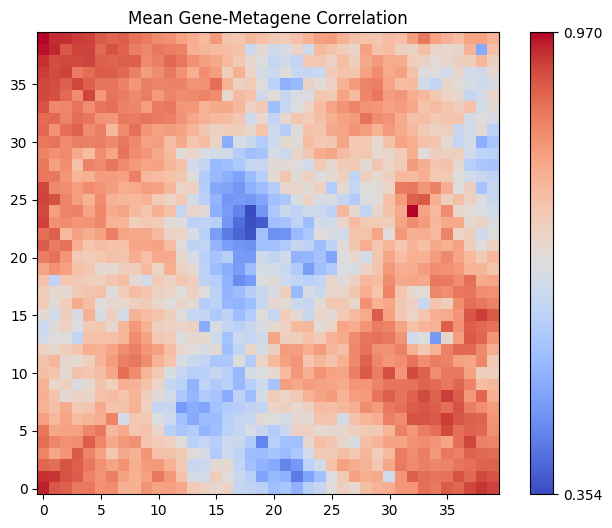

In [14]:
#plot of the average of the correlations between gene expression and metagene in each node.
mapping.correlation(main_map, classification, metagene_map)

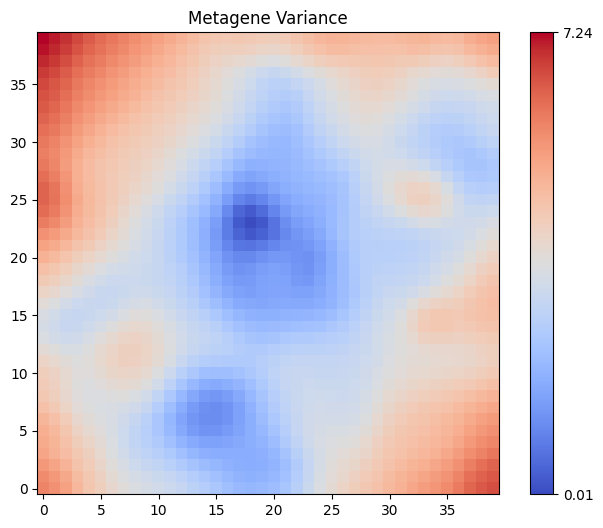

In [15]:
#Variance plot of metagenes
mapping.variance(main_map, metagene_map)

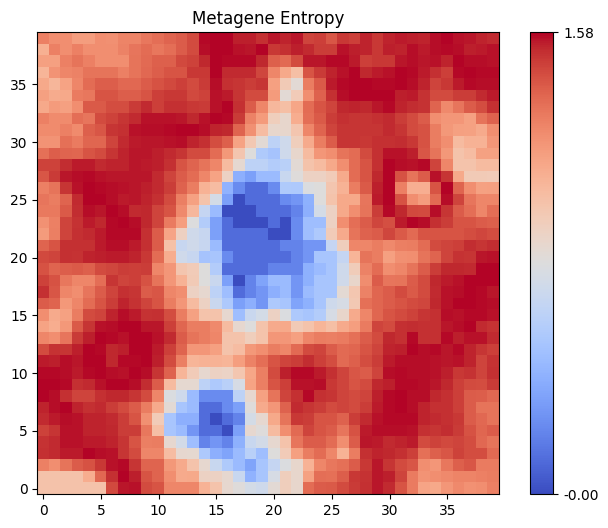

In [16]:
#plot of meatgene entropy, between states of overexpression, underexpression and inconclusive.
mapping.entropy(main_map, metagene_map)

This function will produce an Index Error if the user specifies less maps (n_rows*n_columns) than there are available.

E se não for para meter marcadores? E se quiser cortar partes do título? E se forem gene ids?

Gene 'MYH6' found in index at position (39, 39): MYH6
Coordinates in SOM are'(39, 39)'
Gene 'TNNT2' found in index at position (39, 39): TNNT2
Coordinates in SOM are'(39, 39)'
Gene 'TNNI3' found in index at position (39, 32): TNNI3
Coordinates in SOM are'(32, 39)'
Gene 'MYL2' found in index at position (39, 0): MYL2
Coordinates in SOM are'(0, 39)'
Gene 'EMILIN2' found in index at position (34, 35): EMILIN2
Coordinates in SOM are'(35, 34)'
Gene 'SIRPA' found in index at position (39, 28): SIRPA
Coordinates in SOM are'(28, 39)'


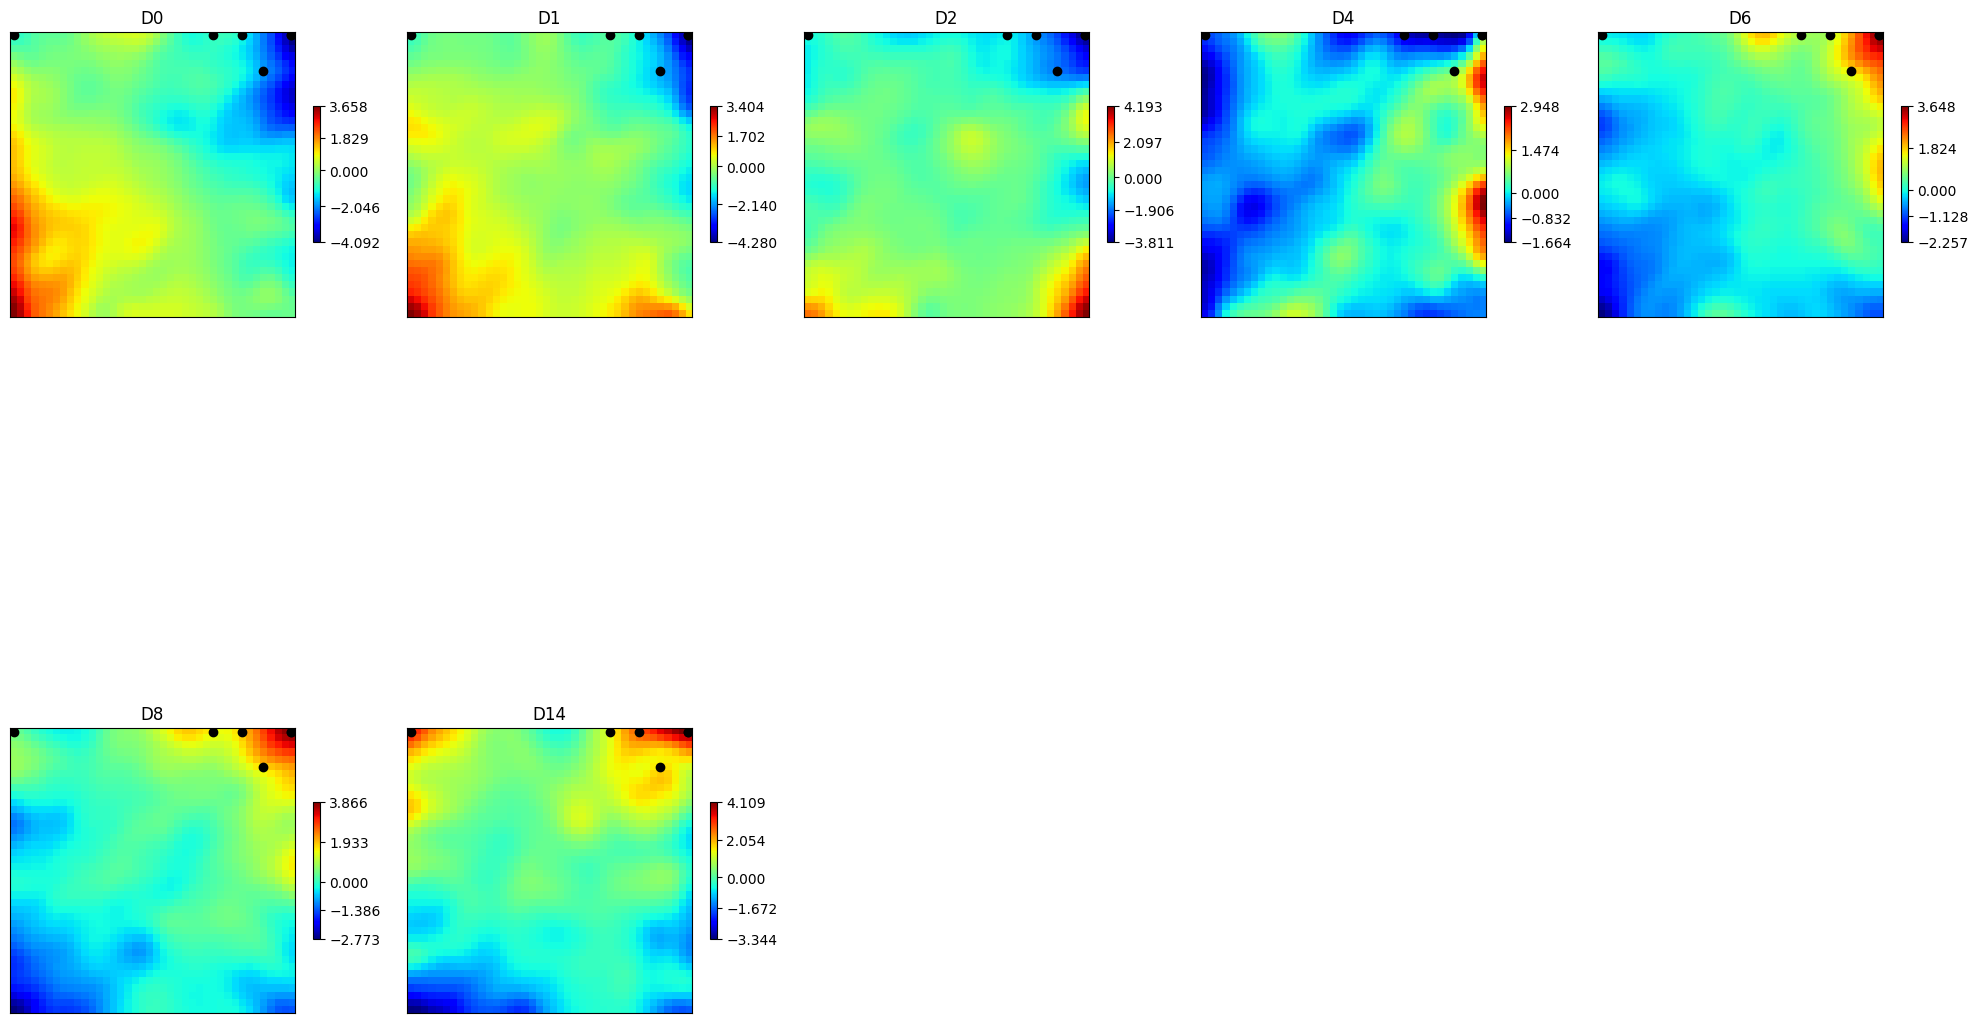

In [8]:
#specifiy gene symbols to look for in the SOM grid.
pluripotency=['POU5F1','NANOG','SOX2','LIN28A' ,'ZFP42' ,'THY1']
mesoderm=['TBXT', 'ANPEP', 'MIXL1', 'ROR2']
cardiac_mesoderm=['MESP1', 'KDR', 'KIT', 'CXCR4', 'PDGFRA']
cardiac_progenitor=['ISL1', 'NKX2-5','GATA4', 'TBX5', 'TBX20', 'MEF2C']
immature_cardio=['MYH6','TNNT2', 'TNNI3', 'MYL2', 'EMILIN2', 'SIRPA']
mapping.averaged_maps(main_map_avg, dataset, nreplicates, immature_cardio, classification, ensembl_id, 4, 5) #plot SOM portraits with the above genes marked

Gene ID:'ENSG00000114062', name:'UBE3A' found in index at position (14, 37): ENSG00000114062
Coordinates in SOM are'(37, 14)'
Gene ID:'ENSG00000224078', name:'SNHG14' found in index at position (32, 36): ENSG00000224078
Coordinates in SOM are'(36, 32)'
Gene ID:'ENSG00000152208', name:'GRID2' found in index at position (20, 28): ENSG00000152208
Coordinates in SOM are'(28, 20)'
Gene ID:'ENSG00000078018', name:'MAP2' found in index at position (39, 31): ENSG00000078018
Coordinates in SOM are'(31, 39)'
Gene ID:'ENSG00000075891', name:'PAX2' found in index at position (14, 39): ENSG00000075891
Coordinates in SOM are'(39, 14)'
Gene ID:'ENSG00000089116', name:'LHX5' found in index at position (0, 39): ENSG00000089116
Coordinates in SOM are'(39, 0)'
Gene 'ENSG00000168267' not found.
Gene ID:'ENSG00000126259', name:'KIRREL2' found in index at position (8, 38): ENSG00000126259
Coordinates in SOM are'(38, 8)'
Gene 'ENSG00000131095' not found.
Gene 'ENSG00000205927' not found.
Gene ID:'ENSG0000021

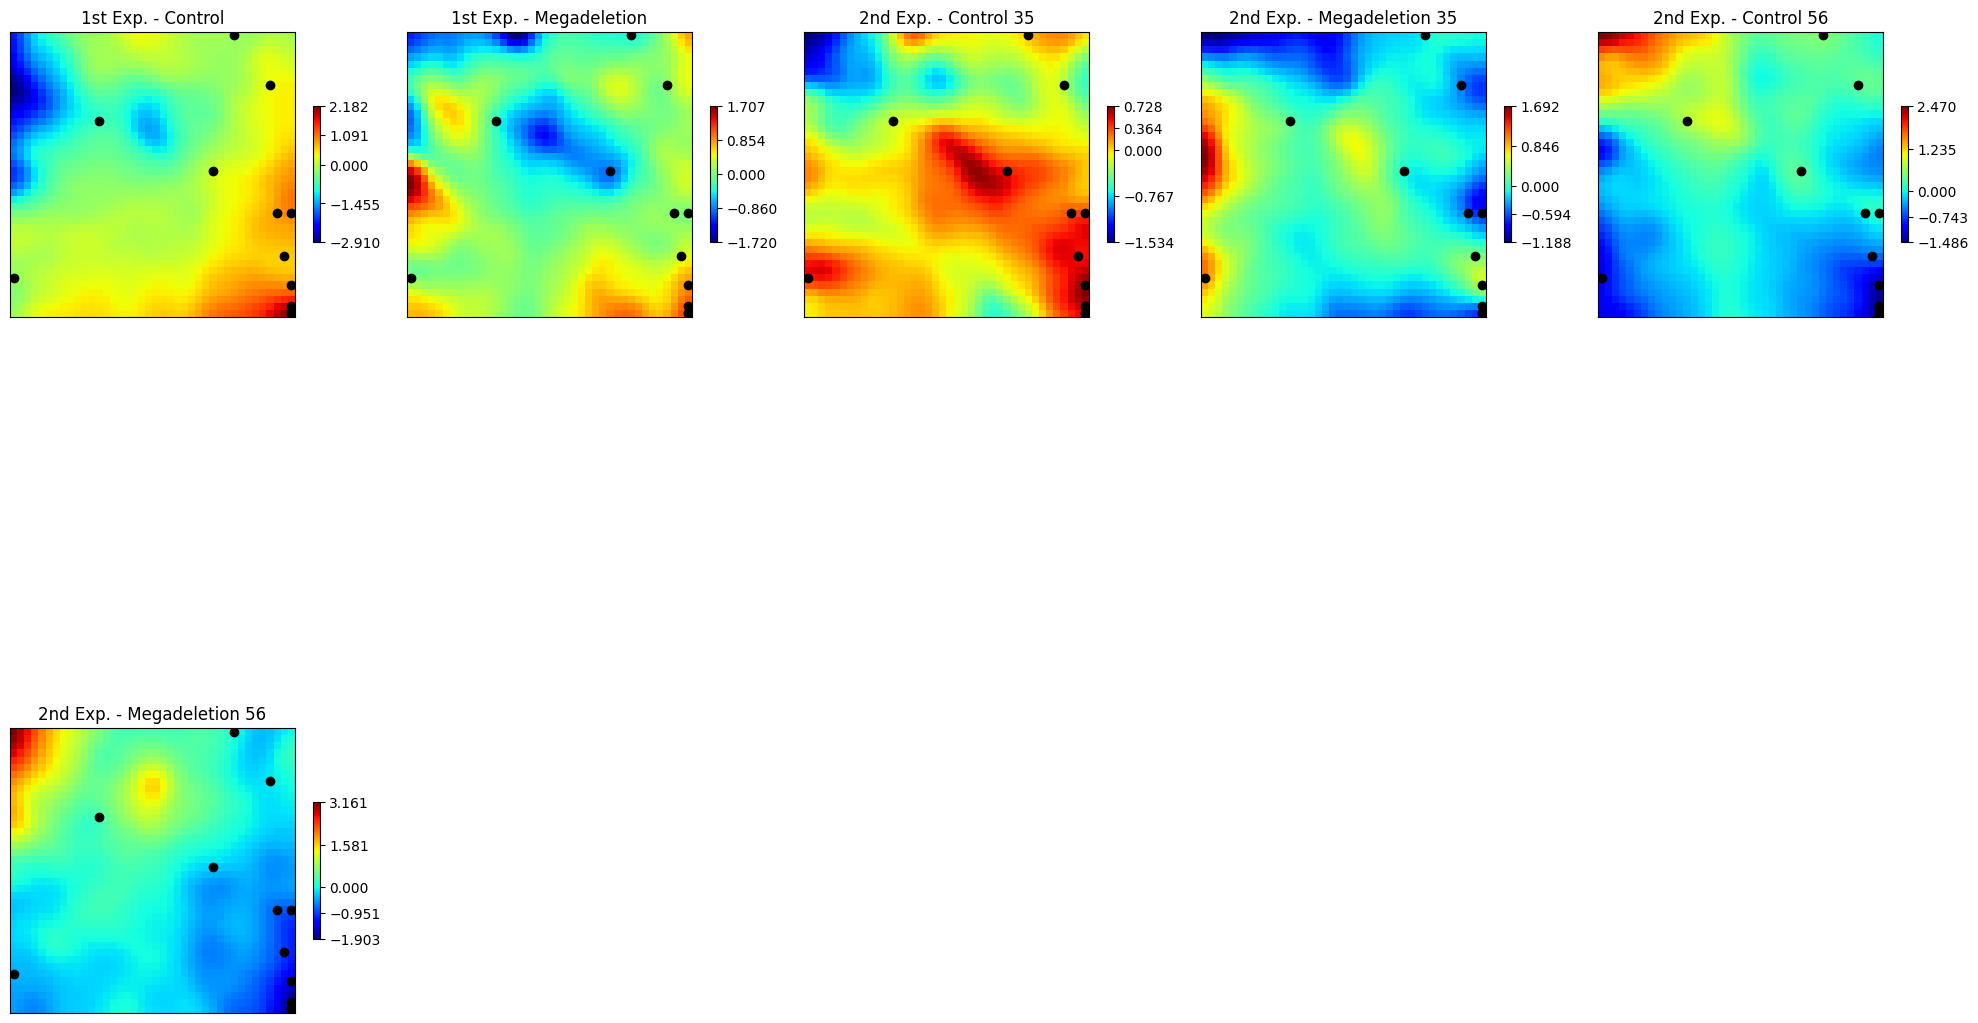

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def avgmapsimao(main_map):
    main_map_avg=[]
    # 1st experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,17]+main_map.weights[:,:,12])/2)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,6]))
    # 2nd experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,10]+main_map.weights[:,:,13]+main_map.weights[:,:,14])/3)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,0]+main_map.weights[:,:,2]+main_map.weights[:,:,3])/3)
    # Controlo 56
    main_map_avg.append((main_map.weights[:,:,11]+main_map.weights[:,:,15]+main_map.weights[:,:,16])/3)
    # Megadeletion 56
    main_map_avg.append((main_map.weights[:,:,1]+main_map.weights[:,:,4]+main_map.weights[:,:,5])/3)
    return main_map_avg

def avgmapsimao2(main_map):
    main_map_avg=[]
    # 1st experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,14]+main_map.weights[:,:,9])/2)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,6]))
    # 2nd experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,7]+main_map.weights[:,:,10]+main_map.weights[:,:,11])/3)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,0]+main_map.weights[:,:,2]+main_map.weights[:,:,3])/3)
    # Controlo 56
    main_map_avg.append((main_map.weights[:,:,8]+main_map.weights[:,:,12]+main_map.weights[:,:,13])/3)
    # Megadeletion 56
    main_map_avg.append((main_map.weights[:,:,1]+main_map.weights[:,:,4]+main_map.weights[:,:,5])/3)
    return main_map_avg

def averaged_maps(main_map_avg, dataset, nreplicates, genelist, classification, ensemblid, n_rows, n_col):
    """
    Plots the averaged SOMs.
    Function gene_search is used to find coordinates of certain genes to plot on top of the SOM.
    Set n_col (int) to the number of columns of your figure and n_rows (int) to the number of rows.
    Title (int) should stay at 0. Used to iterate through the sample names to give each figure its respective name.
    """
    
    stage=SOM.gene_search(genenames=genelist, classification_map=classification.classification_map, ensembl_id=ensemblid)

    n_col=n_col
    n_rows=n_rows
    title=0
    fig = plt.figure(figsize=(20, 7*n_rows))
    gs = fig.add_gridspec(n_rows, n_col)
    xscatter=[]
    yscatter=[]
    titulos=['1st Exp. - Control', '1st Exp. - Megadeletion', '2nd Exp. - Control 35', '2nd Exp. - Megadeletion 35', '2nd Exp. - Control 56', '2nd Exp. - Megadeletion 56']
    

    for i in range(len(stage)): 
        xscatter.append(stage[i][0])
        yscatter.append(stage[i][1]) 

    for i, map_index in enumerate(range(len(main_map_avg))):

        row = i // n_col
        col = i % n_col
        ax = fig.add_subplot(gs[row, col])
        im = ax.imshow(main_map_avg[map_index], cmap='jet', interpolation='none', origin='lower')
        ax.scatter(yscatter, xscatter, c='#000000', marker='o')
        ax.set_title(titulos[i])
        ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
        fig.colorbar(im, ax=ax, shrink=0.2, ticks=[np.min(main_map_avg[map_index]),np.min(main_map_avg[map_index])/2, 0, np.max(main_map_avg[map_index])/2, np.max(main_map_avg[map_index])])
        title+=nreplicates
    fig.tight_layout()
    plt.show()

    return stage

avg_simao=avgmapsimao2(main_map)
genes=['UBE3A', 'SNHG14', 'GRID2', 'MAP2', 'PAX2', 'LHX5', 'PTF1A', 'KIRREL2', 'GFAP', 'OLIG2', 'SKOR2', 'BARHL1', 'ATOH1', 'NRGN', 'PAX6', 'SOX1']
genes2=['WNT7A', 'DLL1', 'GLI2', 'LHX1', 'LHX5', 'EGF', 'PAX2', 'GBX2', 'NEUROG2', 'SOX1', 'GSX2', 'BOC', 'PTCH1', 'PTCH2', 'CCND1']
stage=averaged_maps(avg_simao, simao_dataset, 1, genes , classification, True, 4, 5) #plot SOM portraits with the above genes marked

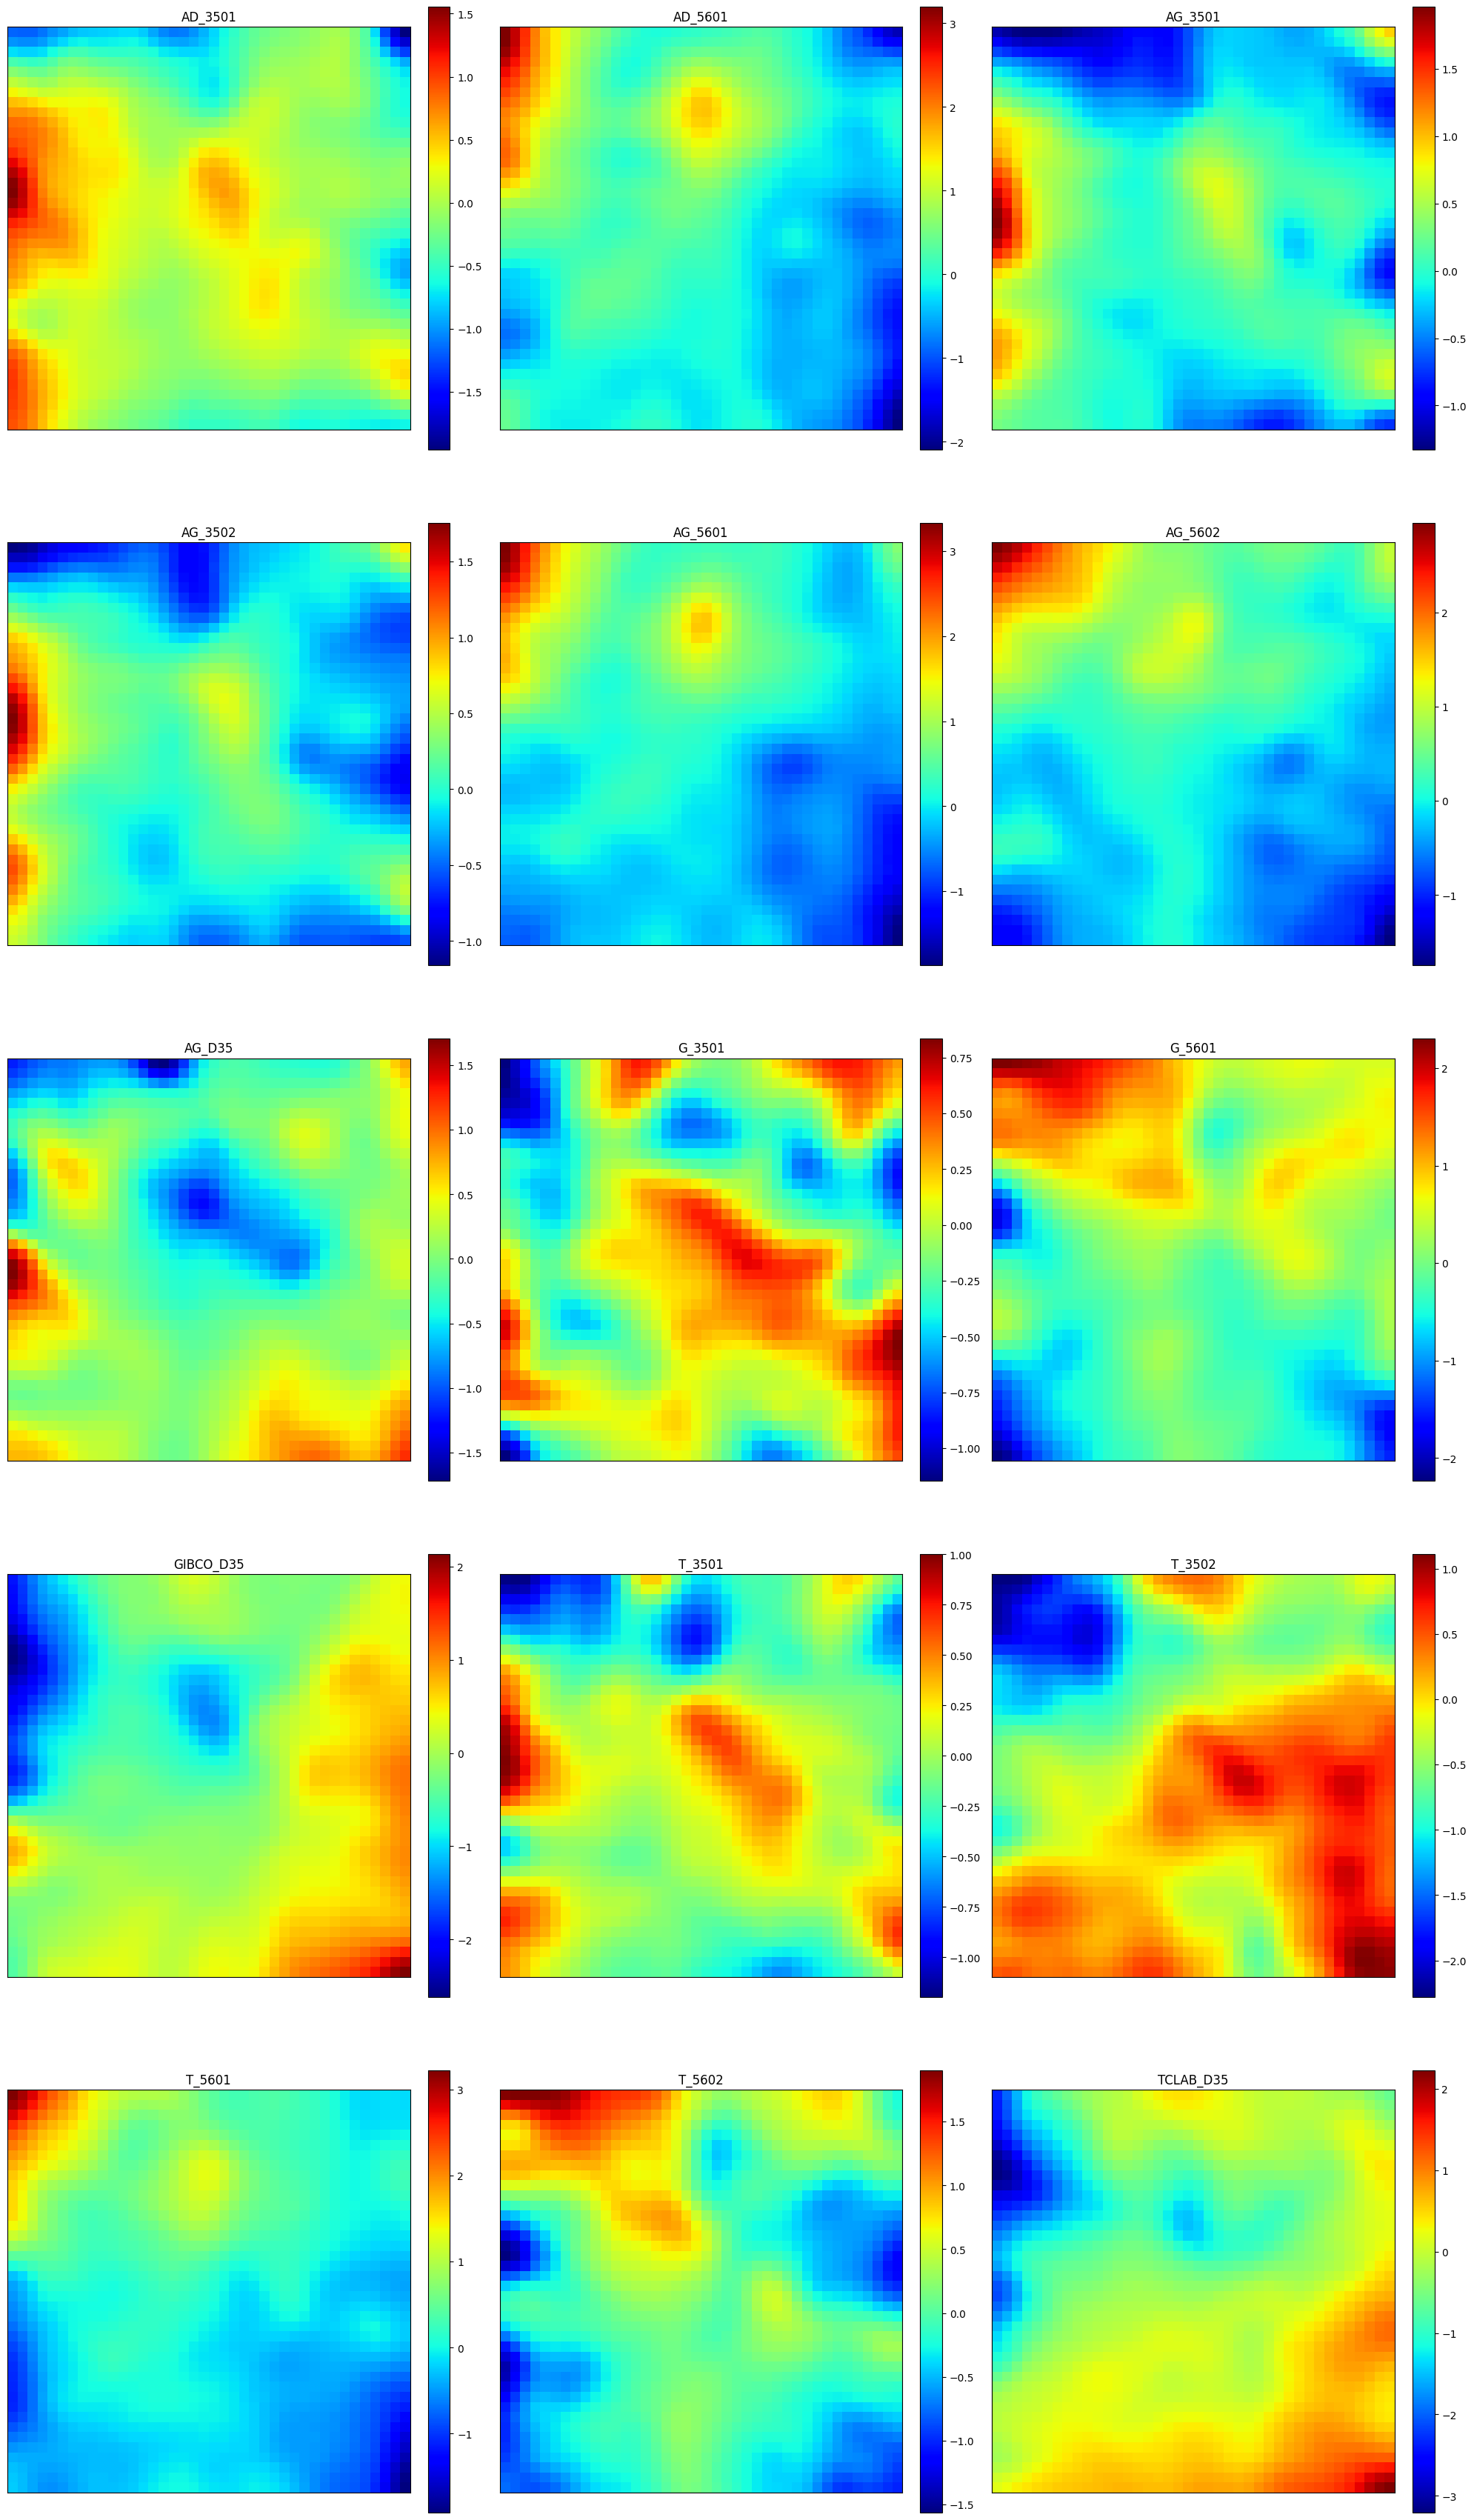

In [19]:
mapping.allmaps(main_map, dataset, 3, 'Simão2') #maps every SOM portrait and saves it in a folder.

placeholder funciona apenas uma vez??
largura e altura do mapa devema mbas ser variavies para permitir melhor visualização

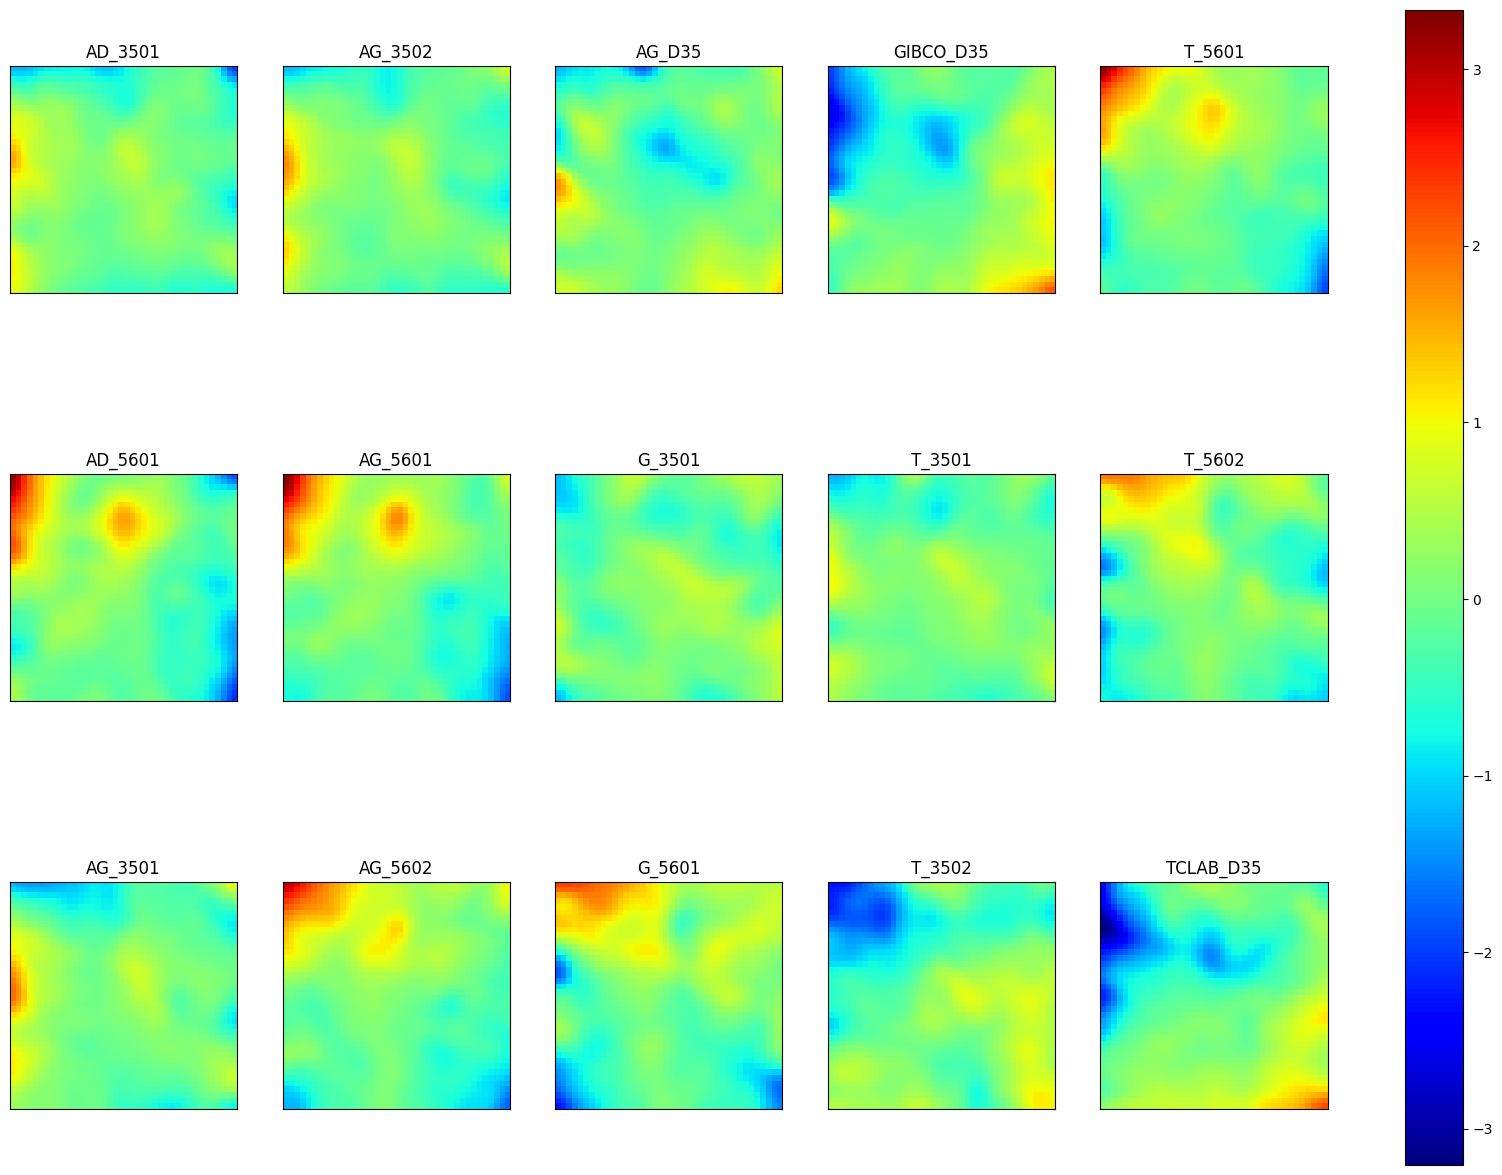

In [24]:
mapping.scaled_maps(main_map, simao_dataset, 3,5) #plots every SOM portrait with the same color scale

### Clustering Module

talvez simplificar um pouco algum deste código. 
1. plot_dendrogram (..., CS1.index, ...) pode não ser muito boa ideia, nomes grandes e caracteres estranhos devme ser cortados
2. Ver se dá para mudar as labels do dendrograma.
3. ATENÇÃO A VALORES BOOLEANOS EM STR
4. Maximum recursion limit?

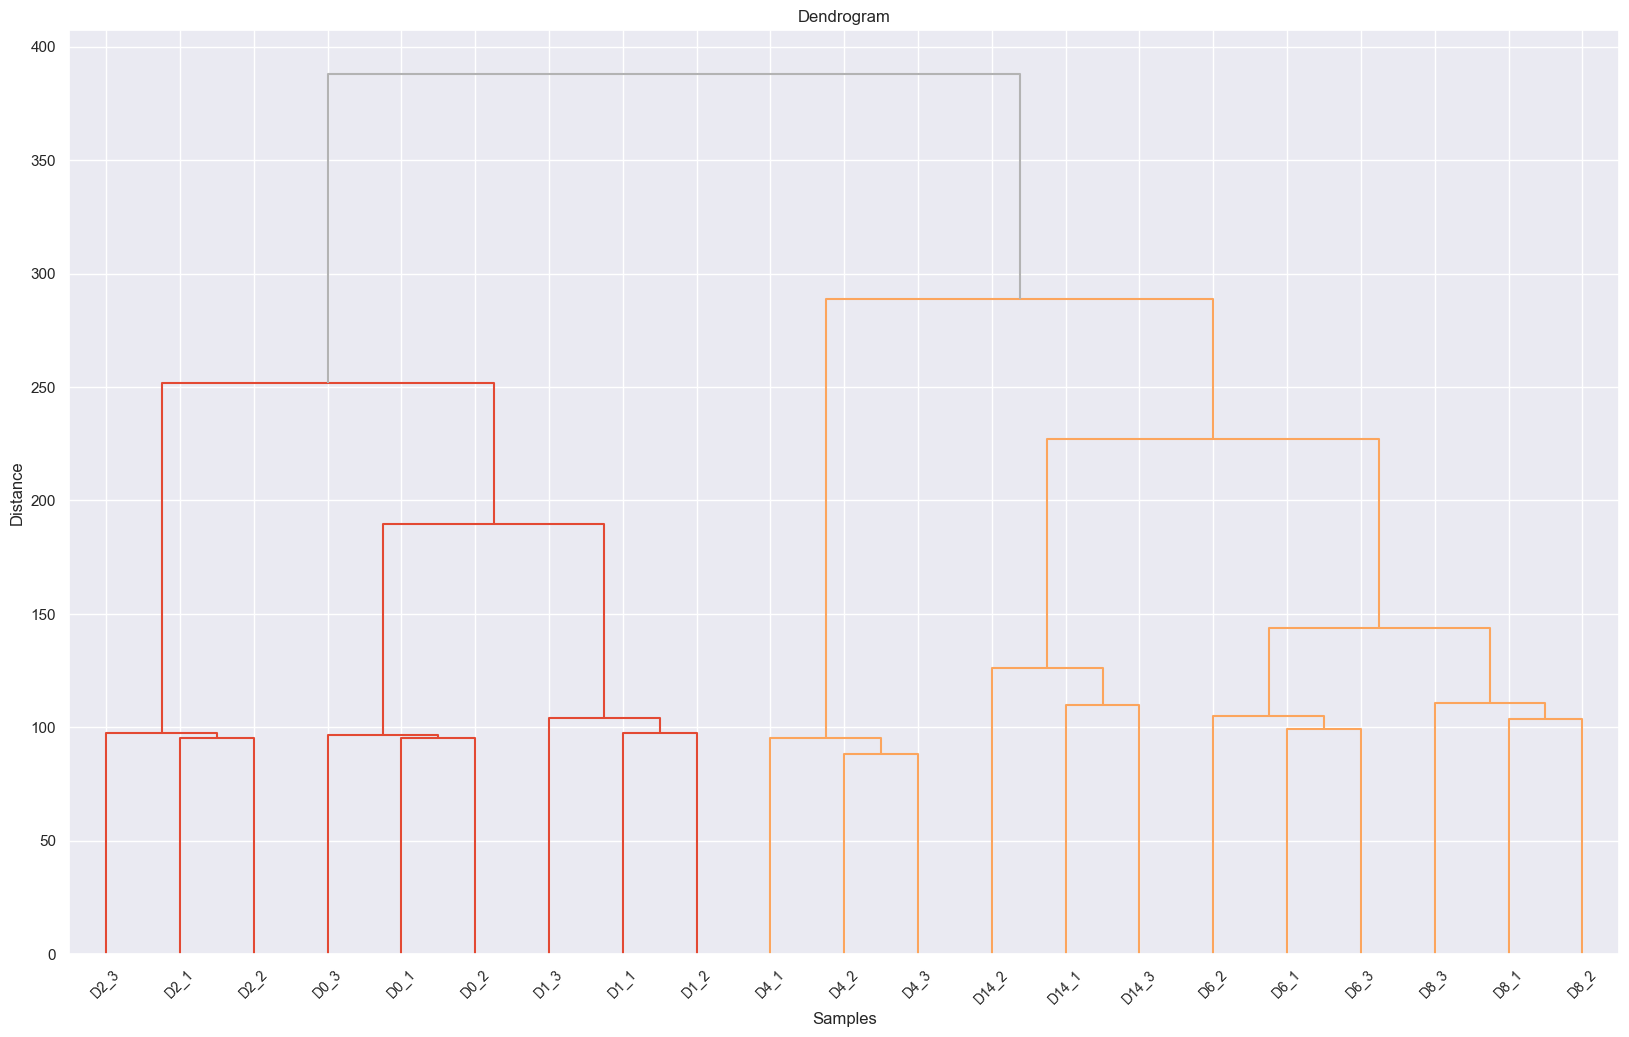

In [25]:
import seaborn as sb
import importlib
importlib.reload(clustering)
CS1=clustering.what_to_cluster(dataset, 'sample')
HC_CS1= clustering.hierarchical_matrix(CS1,'complete', 'euclidean') #linkage_matrix
HC_partition_CS1 = clustering.hierarchical_partition(HC_CS1, 'life_time',0)
sbcmap = sb.color_palette("RdYlBu")
dendogram_CS1 = clustering.plot_dendrogram(HC_CS1, CS1.index, HC_partition_CS1['threshold'], sbcmap)
scores_CS1 = clustering.evaluate_clustering(CS1, HC_partition_CS1['samples_labels'] )

In [374]:
scores_CS1

{'calinski_harabasz': 23.787201759574724,
 'davies_bouldin': 1.57551157190877,
 'silhouette': 0.22106904092599364}

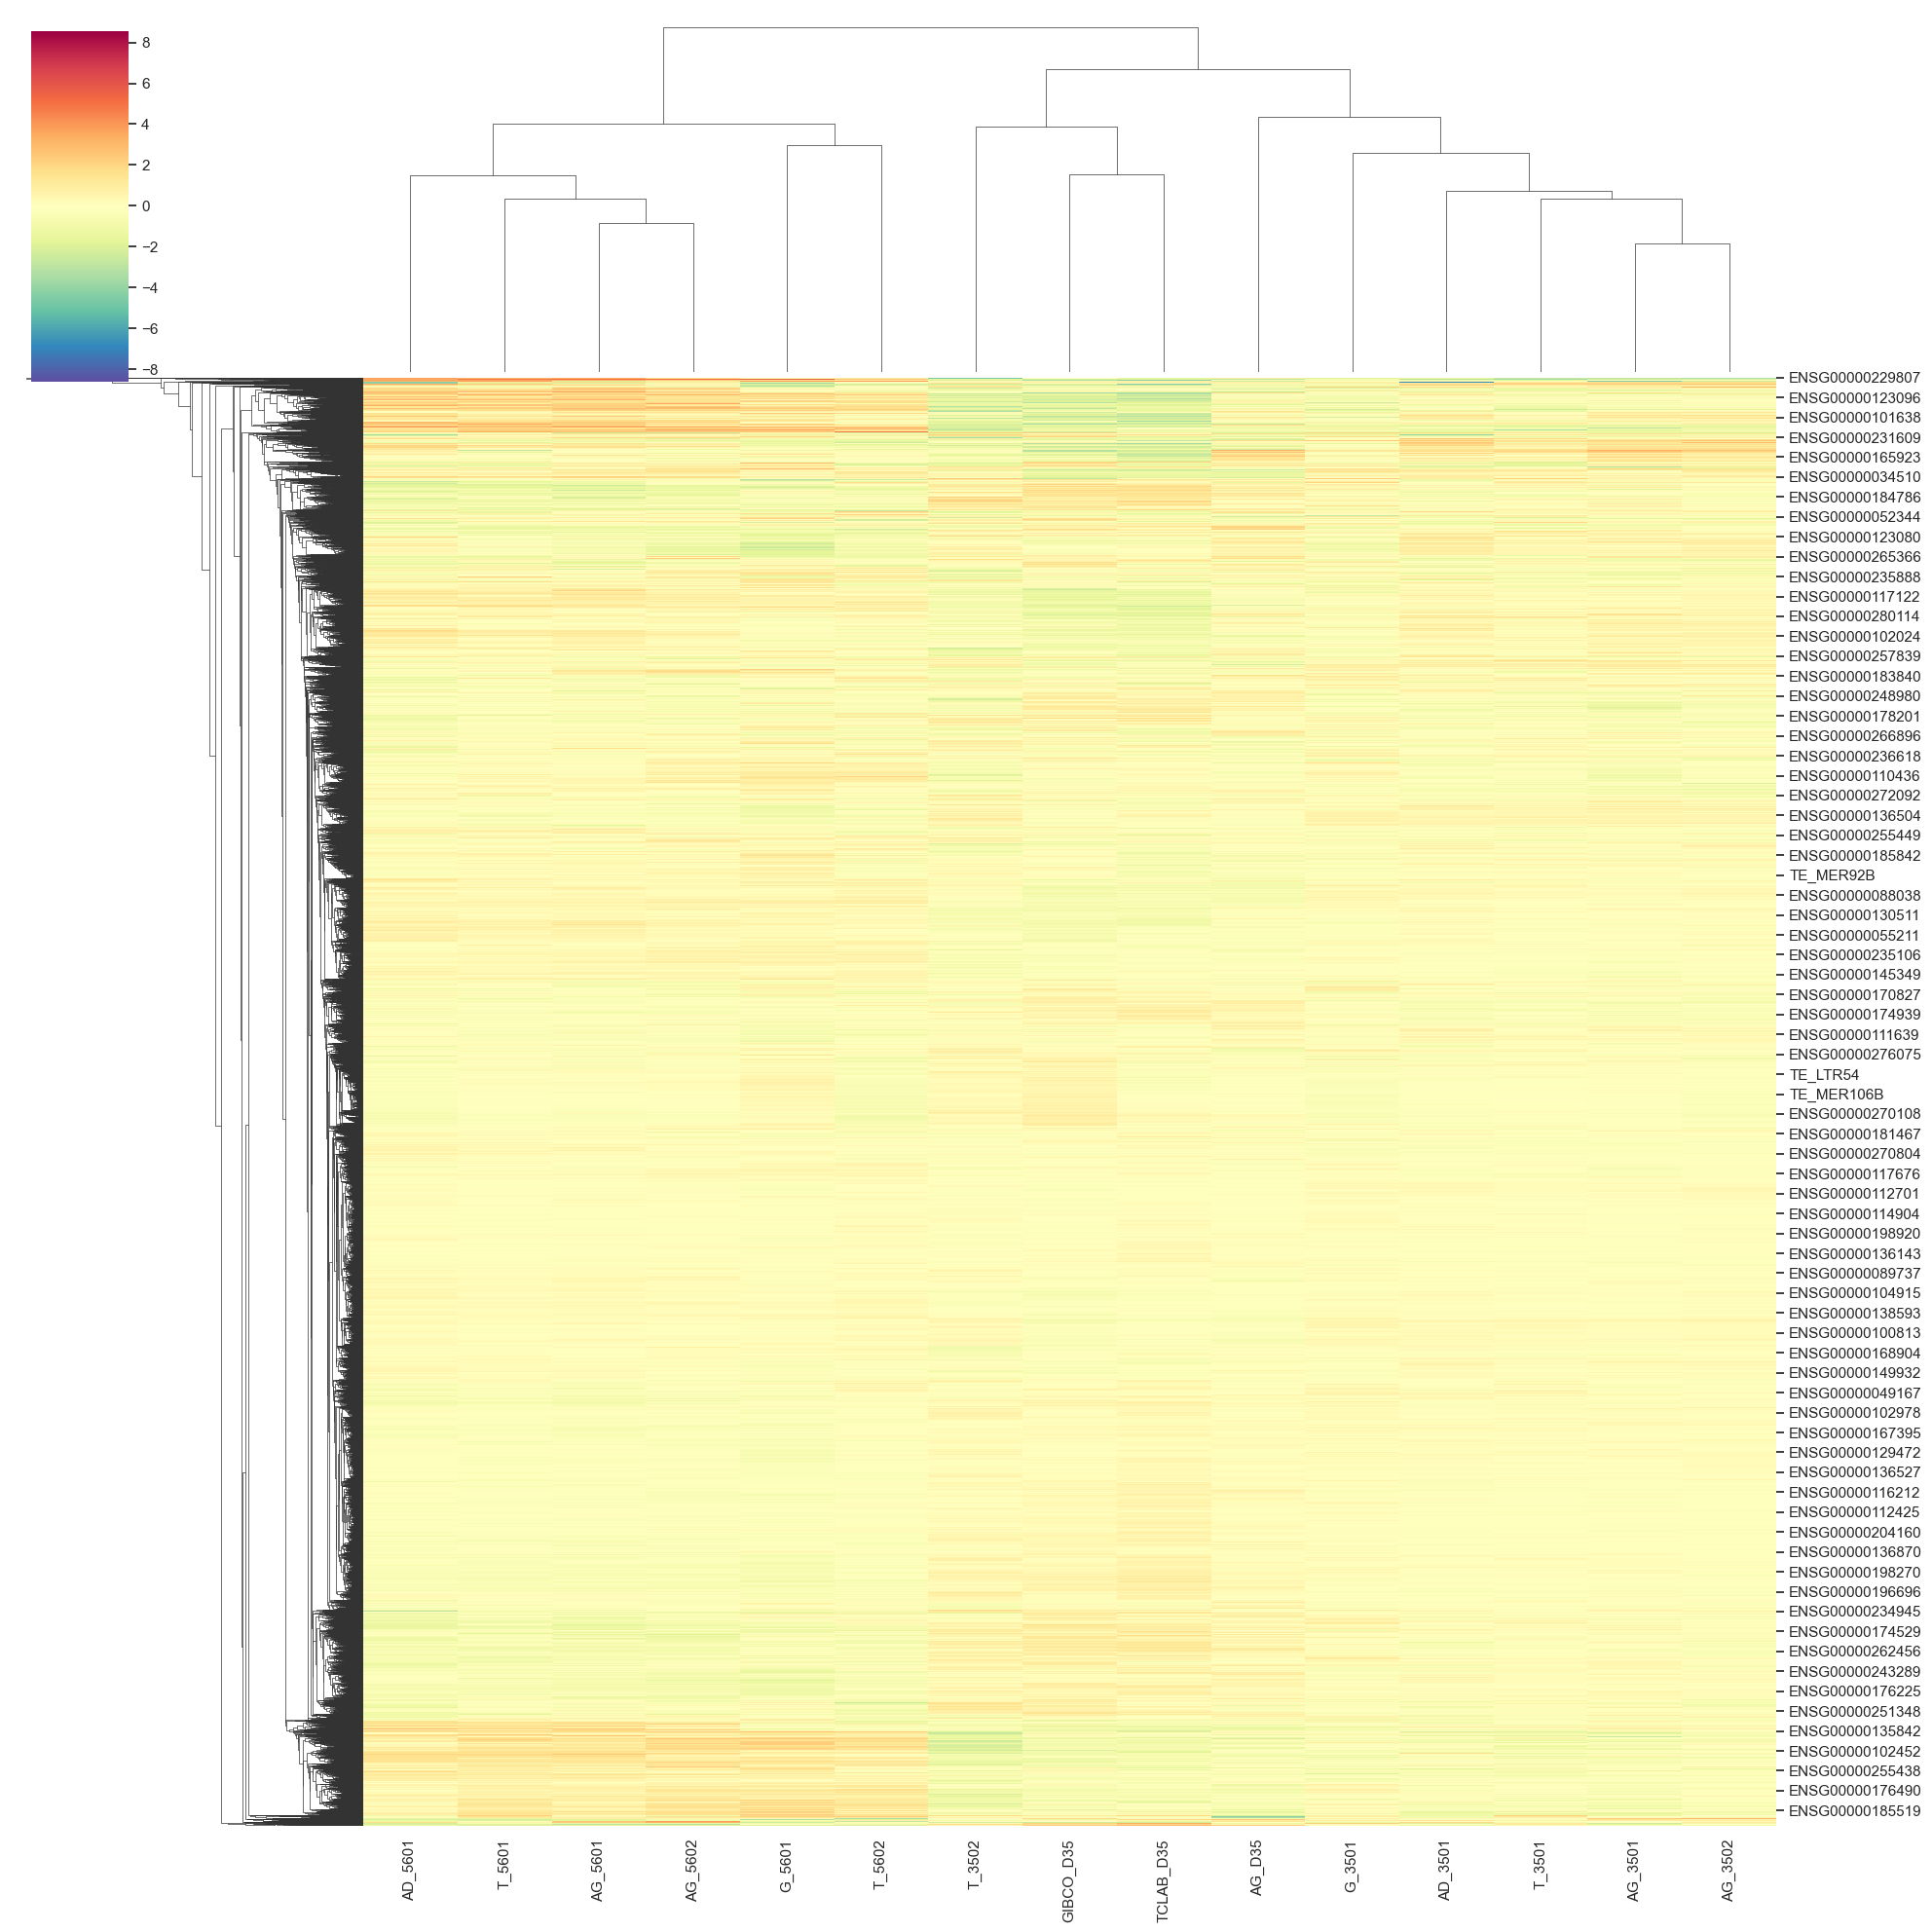

In [29]:
clustering.bicluster(simao_dataset, 'average', 'euclidean')

retirar davies scores do código

number of clusters +1

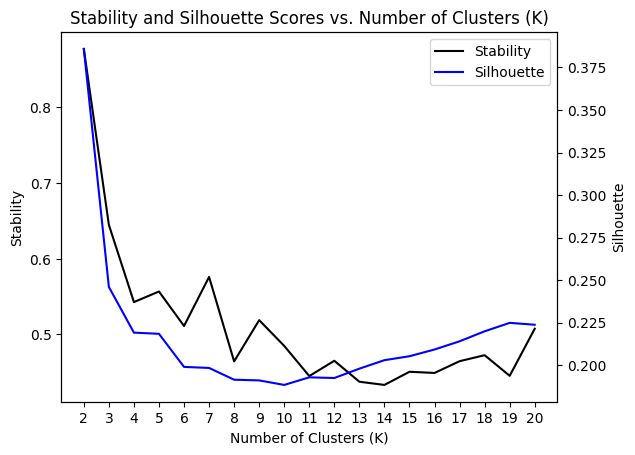

In [37]:
clustering.k_plot(metagene_map, 21) #plots a preliminary evaluation of average cluster stability and average silhouette score for each number of clusters

colormap variável???, definido pelo user
gráfico de barras precisa de labels
quando o número de clusters ultrapassa 20, parte a colorbar
meter o numero dos clusters diretamente no gráfico

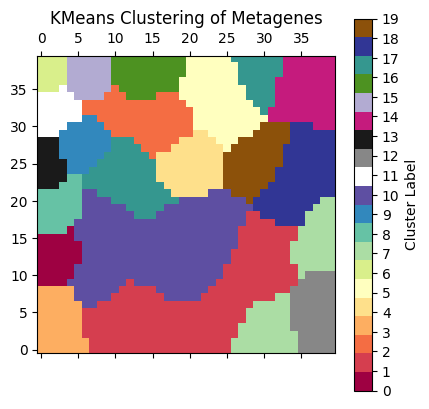

Average Silhouette Score within Cluster: {0: 0.25943079216152115, 1: 0.2178208748393743, 2: 0.11507616780450439, 3: 0.28774092970518295, 4: 0.233733461920893, 5: 0.16392889268509606, 6: 0.3721231348003449, 7: 0.1291500186360963, 8: 0.25368231495399673, 9: 0.31484812844592985, 10: 0.17540373605296605, 11: 0.29957541751305355, 12: 0.209270865066982, 13: 0.28882676427782433, 14: 0.17098868733371314, 15: 0.37108805588079596, 16: 0.2915457162955536, 17: 0.2339689768701163, 18: 0.2643389454674869, 19: 0.28050273301340295}
Total Average: 0.218215053762994


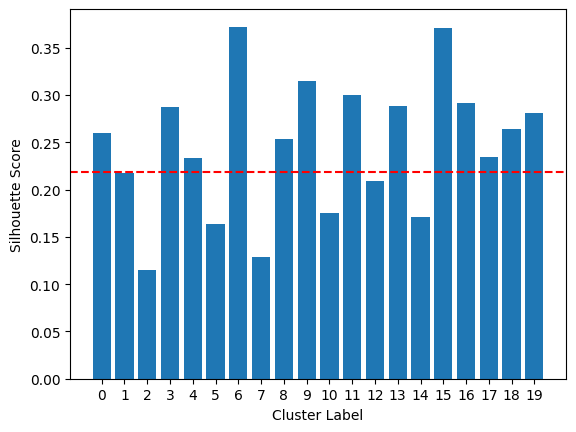

In [8]:
kmeans_labels=clustering.KMeans_clustering(main_map, metagene_map, 20) #performs KMeans algorithm, plotting it and each clusters silhouette score.

In [9]:
kmeans_clustered_symbols=clustering.clustered_symbols_dict(kmeans_labels, 40, genesymbol_grid) #dictionary with every gene symbol within each cluster
kmeans_clustered_ids=clustering.clustered_ids_dict(kmeans_labels, 40, geneid_grid) #dictionary with every gene ensembl id within each cluster

In [40]:
import csv

data = kmeans_clustered_ids  # assuming this is your dictionary of lists

# Find the maximum length of the lists
max_len = max(len(lst) for lst in data.values())

# Open the CSV file for writing
with open('kmeans_10.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header (the keys of the dictionary)
    writer.writerow(data.keys())
    
    # Write the rows, padding shorter lists with None
    for i in range(max_len):
        row = [data[key][i] if i < len(data[key]) else None for key in data.keys()]
        writer.writerow(row)

Silhouette Score: 0.22715939046916447
Davies-Bouldin: 1.109193267255383
Calinski-Harabasz: 348.26142429424766


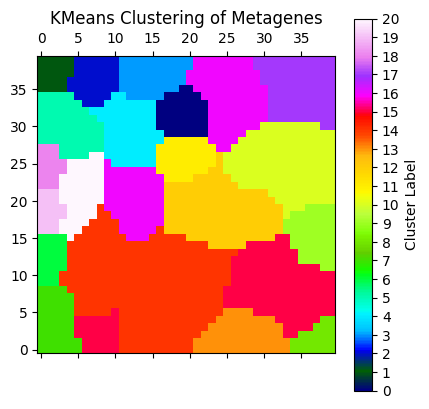

Average Silhouette Score within Cluster: {0: 0.2657672911741118, 1: 0.38536135558045004, 2: 0.3367361794738667, 3: 0.26894093640889494, 4: 0.28920768678126246, 5: 0.1058405449474575, 6: 0.34022540695870135, 7: 0.29720256848211607, 8: 0.4083684763442383, 9: 0.3183353134029939, 10: 0.1788113999742328, 11: 0.34877034349376057, 12: 0.07849613280457686, 13: 0.2887678171588632, 14: 0.253504642919592, 15: 0.1370083857184645, 16: 0.2120642332042829, 17: 0.15841196390619236, 18: 0.367323842328669, 19: 0.3578236505385465, 20: 0.314080309273273}
Total Average: 0.22715939046916447


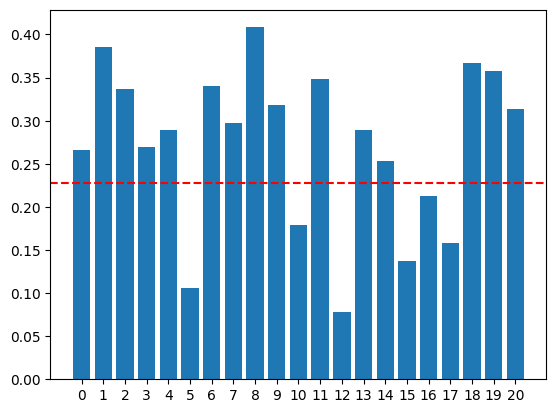

In [61]:
evidence_acc=clustering.evidence_accumulation(metagene_map, 0, 200, 'average') #performs evidence accumulation kmeans

In [260]:
ea_clustered_symbols=clustering.clustered_symbols_dict(evidence_acc, 40, genesymbol_grid) #dictionary with every gene symbol within each cluster
ea_clustered_ids=clustering.clustered_ids_dict(evidence_acc, 40, geneid_grid) #dictionary with every gene ensembl id within each cluster

In [179]:
clustering.Desenho(main_map.weights[:,:,18], 40, filename='frank_day14') #calls draw app with SOM portrait as background

Mask saved as 'frank_day14.npy'
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [160]:
clustering.Desenho(kmeans_labels, 40, filename='normalkmeans') #calls draw app with kmeans as background

In [46]:
clustering.Desenho(evidence_acc, 40, filename='evidenceaccumulation') #calls draw app with evidence accumulation as background

In [184]:
mycluster_symbols, mycluster_ids=clustering.mycluster(input_file='frank_day14.npy', main_map=main_map, genesymbol_grid=genesymbol_grid, geneid_grid=geneid_grid)

## gogsea module

Setting up Gene Ontology is a bit tricky the first time.
Below are a couple of steps to ensure a relatively easy first time setting everything up and installing.

1.  Install goatools package using !pip install goatools

2.  Go to https://www.ncbi.nlm.nih.gov/gene, "9606"[Taxonomy ID] AND alive[property] AND genetype protein coding[Properties] -> send to file

3. Locate file ncbi_gene_results_to_python.py. It should be in one of the files of goatools, where you installed it.

4. run !python your/path/to/ncbi_gene_results_to_python.py -o genes_ncbi_human.py gene_result.txt (KEEP THE NAMES OF THE FILES AS THEY ARE!)

5. The first time running gene ontology may take a while.

In [7]:
!python .venv/Lib/site-packages/goatools/cli/ncbi_gene_results_to_python.py genes_ncbi_human.py gene_result.txt

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2024-06-17) 45,494 Terms
HMS:0:01:10.154452 347,845 annotations, 20,780 genes, 18,718 GOs, 1 taxids READ: gene2go 

Load BP Ontology Enrichment Analysis ...
 83% 17,029 of 20,608 population items found in association

Load CC Ontology Enrichment Analysis ...
 88% 18,165 of 20,608 population items found in association

Load MF Ontology Enrichment Analysis ...
 86% 17,620 of 20,608 population items found in association
input genes: 725
mapped genes: 394

Runing BP Ontology Analysis: current study set of 394 IDs.
 92%    361 of    394 study items found in association
100%    394 of    394 study items found in population(20608)
Calculating 12,143 uncorrected p-values using fisher_scipy_stats
  12,143 terms are associated with 17,029 of 20,608 population items
   1,966 terms are associated with    361 of    394 study items
  METHOD fdr_bh:
      17 GO terms found significant (< 0.05=alpha) ( 17 enriched +   0 purified): sta

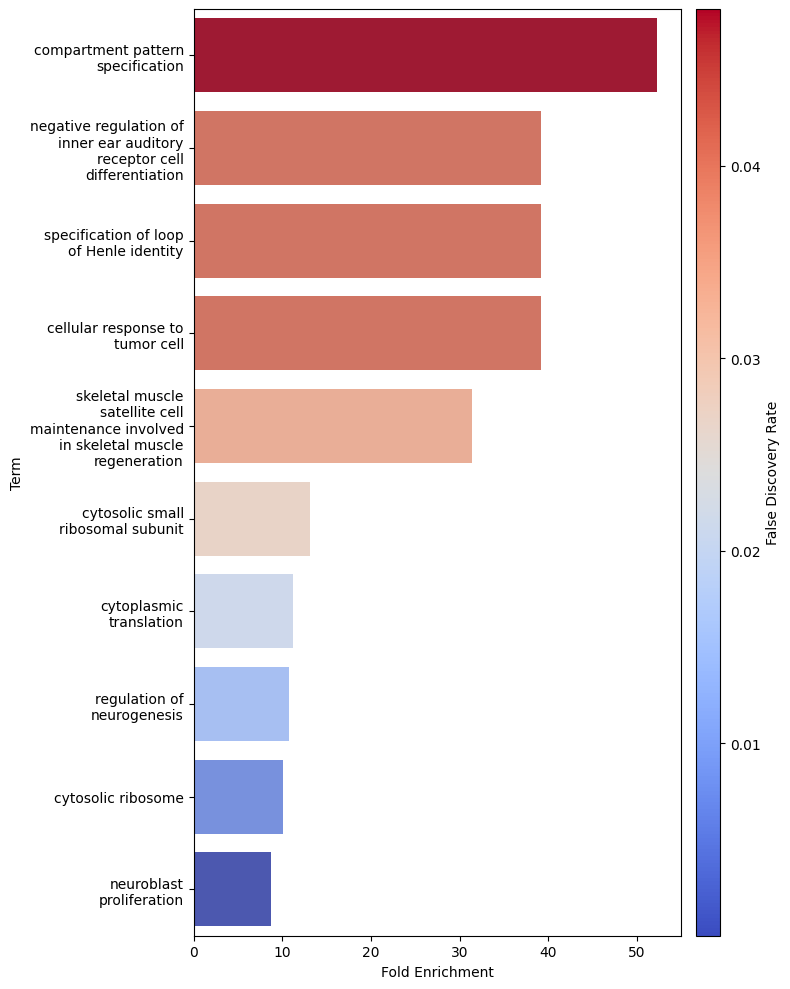

In [35]:
df=gogsea.cluster_go(clustered_genes=kmeans_clustered_symbols, cluster_number=12) #performs gene ontology, on the selected cluster from the selected dictionary.
gogsea.gontology(df) #plots results

In [12]:
gogsea.cluster_to_go(kmeans_clustered_symbols, 8, 'what') #saves gene symbols to file and prints it, if you intend to perform gene ontology somewhere else

CD9
ADD2
NOS1
PIM2
MT2A
SOX3
GLB1L3
TRIML2
FOXD3
PSMB8
RP11-69I8.2
RP11-562F9.2
CTD-2142D14.1
RP11-297M9.1
RP11-640N20.6
PLA2G3
SLC15A3
HTR7
WBSCR17
BEND4
MICB
EPHA1-AS1
AP002856.5
ADCY2
CSMD2
CHST8
FHDC1
NLGN4X
CBR1
FUT9
ANKRD35
AC003973.3
POU2F2
NTS
LRP8
TMEM74
TTLL6
SNTG2
TCN2
HPDL
SH2D5
NAP1L6
RP11-313J2.1
RNA5SP304
TMEM178B
RARRES2
TUBA4A
GRID2
B3GNT7
KLKB1
ZDHHC22
GABRA5
THBS2
C9orf135
HLA-DPB2
RP11-132A1.3
RP11-457D13.4
SLC38A5
FGF2
VASH2
MB21D1
GPR176
MT1X
MT1F
D21S2088E
GABRA3
PPP2R2C
PYCARD
NPTX2
FAM57B
RBFOX3
MFSD2A
RHOH
MT1E
UGT8
KLRG2
AC116614.1
GSTO2
EPHX3
OLFM1
HERC5
RHBDL3
HRASLS5
ZNF560
AP3B2
DSCC1
RASGEF1A
PPM1N
CTC-260E6.4
POLR3G
GDPD2
UNC13A
LECT1
GYLTL1B
CYP2S1
MUC3A
LCK
FOXD3-AS1
LINC00545
AC005062.2
LINC00599
RP13-16D10.1
HAS3
ANKRD18CP
ATCAY
RPRML
RP11-74E22.8
SCNN1A
CLDN10
PCDH1
FGF19
CDCP1
GNG4
CADM2
ETV4
SLC6A15
TCF15
SYT14
TERT
RET
TCEAL2
HLA-DOA
RP6-24A23.7
CAPG
CACNG7
TEX15
KCNK5
NHLH2
ZIC2
GAL
DNMT3B
CHGA
SCG3
NANOG
DPPA4
GRM4
MT1G
ZSCAN10
DCLK1
VRTN
USP4

HÁ OUTROS PLOTS DO GSEA QUE PODEM SER INTERESSANTES

Será que devíamos fazer o ranking para cada sample indvidual e não para todas de umas vez?

FDR frequentemente 0. sus

In [10]:
import importlib
importlib.reload(gogsea)
all_ids=[]
for cluster_nmbr in range(len(kmeans_clustered_ids)):
    for gene in kmeans_clustered_ids[cluster_nmbr]:
        all_ids.append(gene)

all_symbols=[]
for cluster_nmbr in range(len(kmeans_clustered_symbols)):
    for gene in kmeans_clustered_symbols[cluster_nmbr]:
        all_symbols.append(gene)
#ranks genes within a cluster by their maximum expression values
#Attention: if ensembl_id=True, use genes_ids, else use gene_symbols.
df_sorted=gogsea.gsea_ranking(all_ids, classification.classification_map, Ensembl, True)
df_sorted

Number of genes:20450


,gene_symbol,max_exp
18762,XIST,8.550879
8433,TYRP1,7.158146
17787,,6.393185
17791,,6.380971
19106,MT-RNR2,6.362932
...,...,...
9139,EHMT1,0.105634
2923,ALS2,0.097532
16911,DMWD,0.097409
16910,DMPK,0.096324


Gene-set library from Enrichr (https://maayanlab.cloud/Enrichr/#libraries)

2024-10-10 17:28:54,856 [WARNING] Duplicated values found in preranked stats: 0.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


                                        Term  false discovery rate  \
0                Aminoacyl-tRNA biosynthesis                   0.0   
1                            Mismatch repair                   0.0   
2               Systemic lupus erythematosus                   0.0   
3           Protein digestion and absorption                   0.0   
4    Neuroactive ligand-receptor interaction                   0.0   
..                                       ...                   ...   
285                Pentose phosphate pathway                   1.0   
286                              Ferroptosis                   1.0   
287                  beta-Alanine metabolism                   1.0   
288                     Galactose metabolism                   1.0   
289  Biosynthesis of unsaturated fatty acids                   1.0   

     enrichment score  normalized es  
0           -0.390379      -2.973244  
1           -0.343186      -2.280390  
2            0.550719       2.027968  
3  

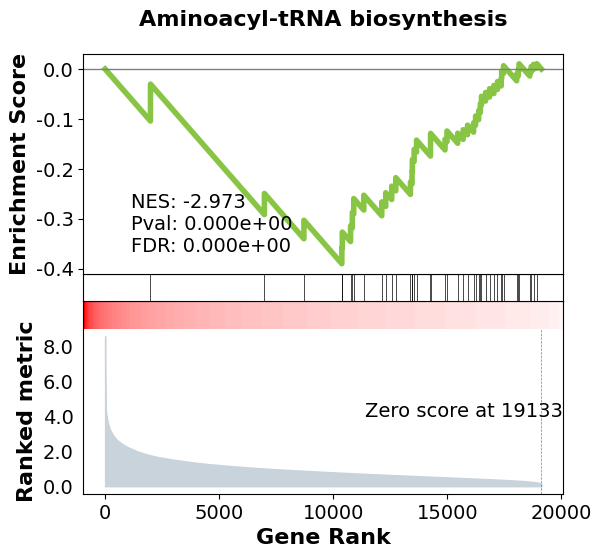

In [40]:
#performs geneset enrichment analysis, with the rank previously given and the geneset provided from Enrichr
out_df=gogsea.enrichment(df_sorted, 'KEGG_2021_Human', 15, 500)

From https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#C2

In [12]:
geneset_h=gogsea.geneset_into_dict('Gene Sets/h.all.v2024.1.Hs.json')
geneset_c2=gogsea.geneset_into_dict('Gene Sets/c2.all.v2024.1.Hs.json')
geneset_c3=gogsea.geneset_into_dict('Gene Sets/c3.all.v2024.1.Hs.json')
geneset_c5=gogsea.geneset_into_dict('Gene Sets/c5.all.v2024.1.Hs.json')
geneset_c8=gogsea.geneset_into_dict('Gene Sets/c8.all.v2024.1.Hs.json') #converts json file into the correct format.

2024-10-12 18:51:16,688 [WARNING] Duplicated values found in preranked stats: 0.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


                                                  Term  false discovery rate  \
0                DESCARTES_FETAL_ADRENAL_STROMAL_CELLS                   0.0   
1                  DESCARTES_FETAL_CEREBRUM_ASTROCYTES                   0.0   
2                    DESCARTES_FETAL_EYE_STROMAL_CELLS                   0.0   
3                 DESCARTES_FETAL_KIDNEY_STROMAL_CELLS                   0.0   
4    CUI_DEVELOPING_HEART_COMPACT_VENTRICULAR_CARDI...                   0.0   
..                                                 ...                   ...   
694  GAUTAM_EYE_IRIS_CILIARY_BODY_CILIARY_BODY_ENDO...                   1.0   
695  FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...                   1.0   
696      DESCARTES_MAIN_FETAL_CLC_IL5RA_POSITIVE_CELLS                   1.0   
697                GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS                   1.0   
698   DESCARTES_MAIN_FETAL_SLC26A4_PAEP_POSITIVE_CELLS                   1.0   

     enrichment score  normalized es  


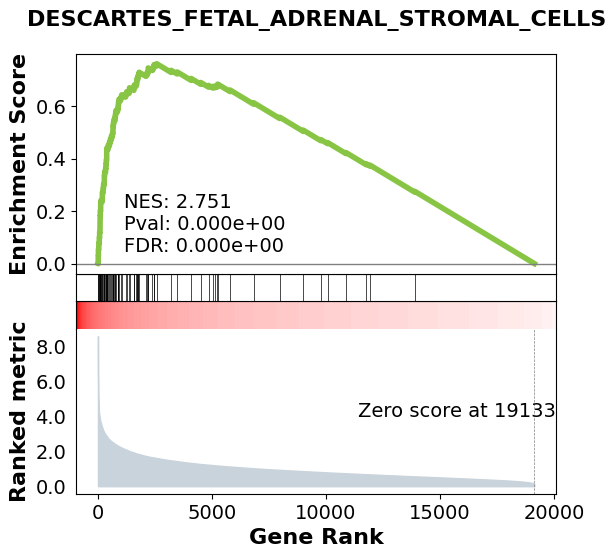

In [21]:
out_df=gogsea.enrichment(df_sorted, geneset_c8, 15, 500) #geneset enrichment analysis conducted on the newly built geneset